<a href="https://colab.research.google.com/github/pavansai26/end-to-end-project/blob/master/end_to_end_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from scipy.stats import boxcox
from os import listdir

In [ ]:
pip install shap

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394129 sha256=e7b2aa83a8750f0713bbc269e5174030db2da2ea455b1f69acf82d82bcf20c97
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import shap
shap.initjs()


In [ ]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 1000)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
data=pd.read_csv('/gdrive/My Drive/Colab Notebooks/Data_csv.csv',encoding = 'ISO-8859-1')

In [ ]:
missing_percentage = data.isnull().sum() / data.shape[0] * 100
missing_percentage

ï»¿transaction id           0.000000
product id                  0.000000
product description         0.268311
quantity sold               0.000000
transaction timestamp       0.000000
unit price                  0.000000
customer id                24.926694
transaction country         0.000000
timestamp                   0.000000
date                        0.000000
day_name                    0.000000
day_of_month                0.000000
month_of_year               0.000000
time_of_day(hh:mm:ss)       0.000000
dtype: float64

In [ ]:
data[data['product description'].isnull()].head()

,ï»¿transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
622,536414,22139,NaN,56,12/01/2010 11:52,0.0,NaN,United Kingdom,12/01/2010 11:52,12/01/2010,Wednesday,1,December,11:52:00
1970,536545,21134,NaN,1,12/01/2010 14:32,0.0,NaN,United Kingdom,12/01/2010 14:32,12/01/2010,Wednesday,1,December,14:32:00
1971,536546,22145,NaN,1,12/01/2010 14:33,0.0,NaN,United Kingdom,12/01/2010 14:33,12/01/2010,Wednesday,1,December,14:33:00
1972,536547,37509,NaN,1,12/01/2010 14:33,0.0,NaN,United Kingdom,12/01/2010 14:33,12/01/2010,Wednesday,1,December,14:33:00
1987,536549,85226A,NaN,1,12/01/2010 14:34,0.0,NaN,United Kingdom,12/01/2010 14:34,12/01/2010,Wednesday,1,December,14:34:00


In [ ]:
data["InvoiceDate"] = pd.to_datetime(data['transaction timestamp'], cache=True)

data.InvoiceDate.max() - data.InvoiceDate.min()

Timedelta('373 days 04:24:00')

In [ ]:
print("Datafile starts with timepoint {}".format(data.InvoiceDate.min()))
print("Datafile ends with timepoint {}".format(data.InvoiceDate.max()))

Datafile starts with timepoint 2010-12-01 08:26:00
Datafile ends with timepoint 2011-12-09 12:50:00


In [ ]:
data["IsCancelled"]=np.where(data['ï»¿transaction id'].apply(lambda l: l[0]=="C"), True, False)
data.IsCancelled.value_counts() / data.shape[0] * 100

False    98.286059
True      1.713941
Name: IsCancelled, dtype: float64

In [ ]:
data.loc[data.IsCancelled==True].describe()

,quantity sold,unit price,customer id,day_of_month
count,9288.000000,9288.000000,8905.000000,9288.000000
mean,-29.885228,48.393661,14991.667266,14.898363
std,1145.786965,666.600430,1706.772357,8.608382
min,-80995.000000,0.010000,12346.000000,1.000000
25%,-6.000000,1.450000,13510.000000,7.000000
50%,-2.000000,2.950000,14895.000000,14.000000
75%,-1.000000,5.950000,16393.000000,22.000000
max,-1.000000,38970.000000,18282.000000,31.000000


In [ ]:
data = data.loc[data.IsCancelled==False].copy()
data = data.drop("IsCancelled", axis=1)

In [ ]:
data['product id'].nunique()

4059

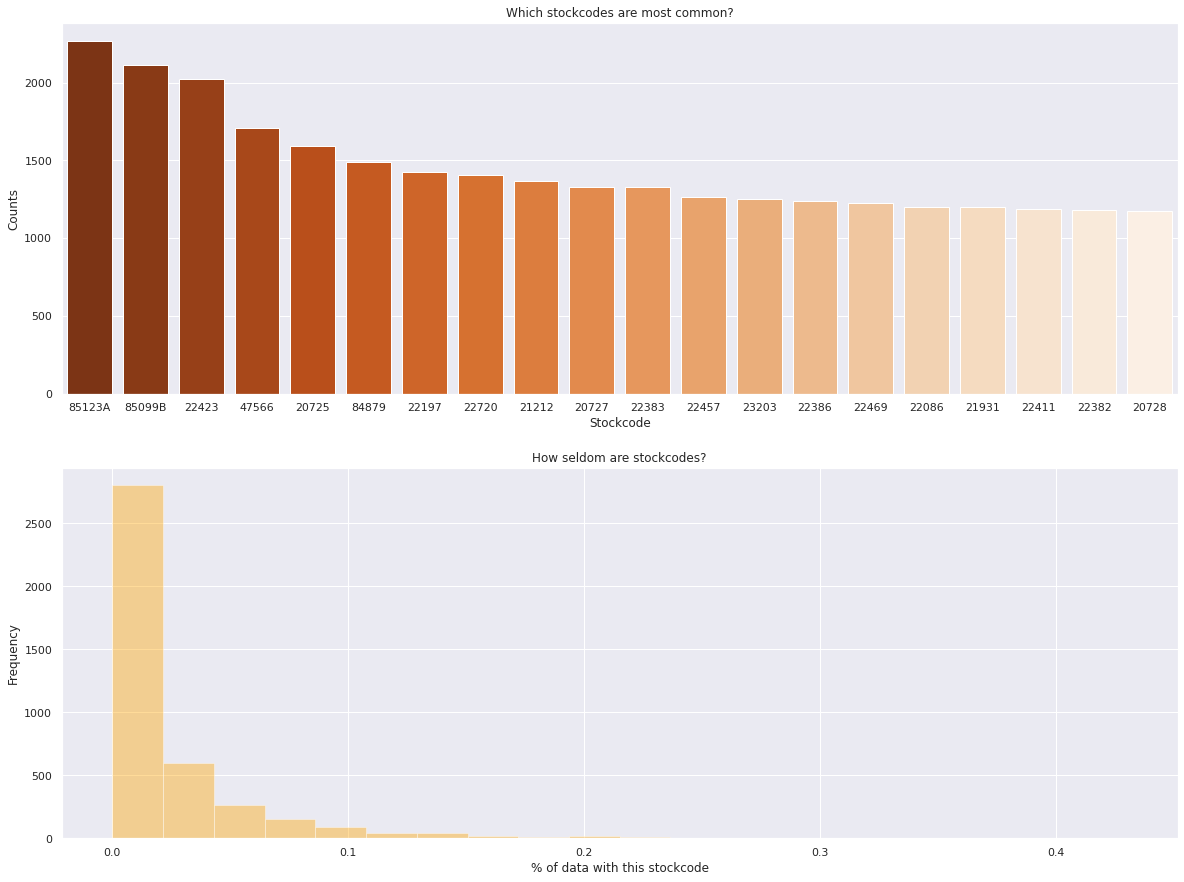

In [ ]:
stockcode_counts = data['product id'].value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(stockcode_counts.iloc[0:20].index,
            stockcode_counts.iloc[0:20].values,
            ax = ax[0], palette="Oranges_r")
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Which stockcodes are most common?");
sns.distplot(np.round(stockcode_counts/data.shape[0]*100,2),
             kde=False,
             bins=20,
             ax=ax[1], color="Orange")
ax[1].set_title("How seldom are stockcodes?")
ax[1].set_xlabel("% of data with this stockcode")
ax[1].set_ylabel("Frequency");


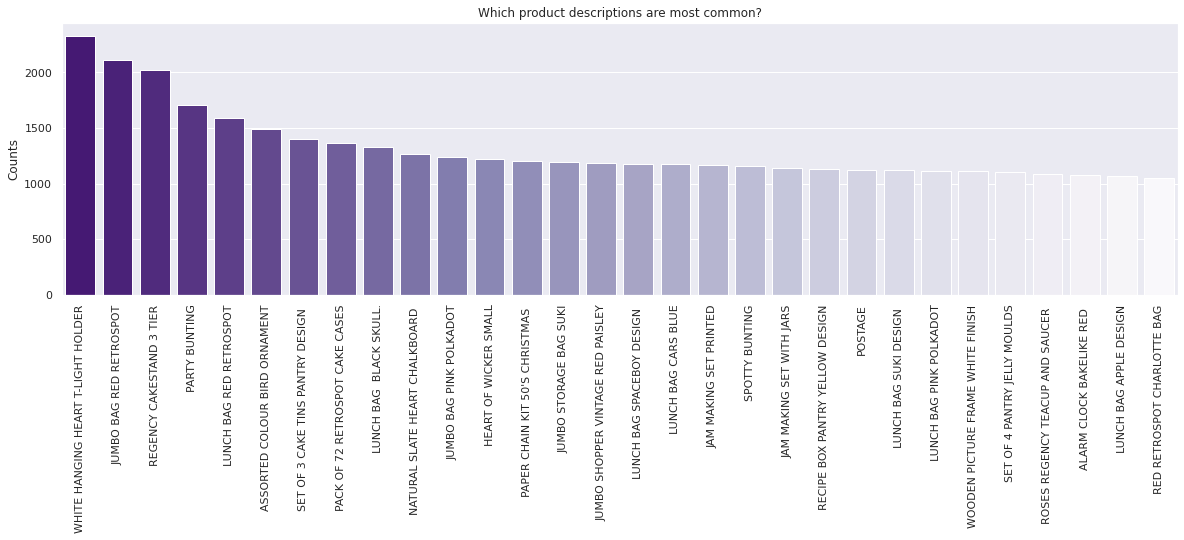

In [ ]:
description_counts = data['product description'].value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(description_counts.index, description_counts.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Which product descriptions are most common?");
plt.xticks(rotation=90);

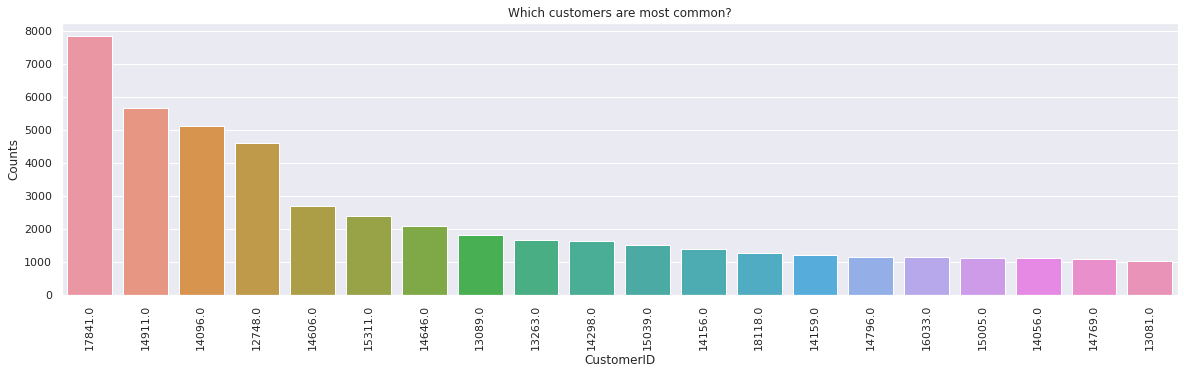

In [ ]:
customer_counts = data['customer id'].value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index)
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title("Which customers are most common?");
plt.xticks(rotation=90);

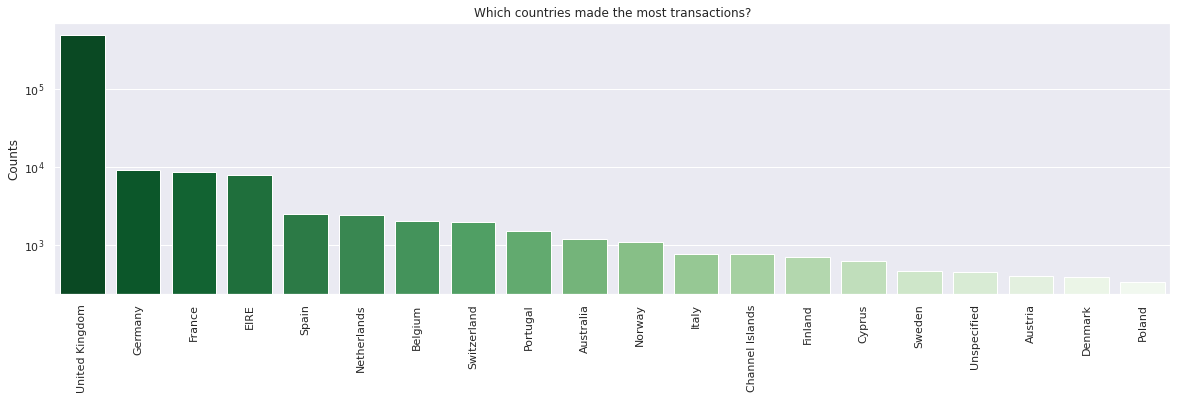

In [ ]:
country_counts = data['transaction country'].value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Greens_r")
plt.ylabel("Counts")
plt.title("Which countries made the most transactions?");
plt.xticks(rotation=90);
plt.yscale("log")

How many percentage of entries are inside UK?

In [ ]:
data.loc[data['transaction country']=="United Kingdom"].shape[0] / data.shape[0] * 100

91.55140334309012

 indicate inside or outside of the UK:

In [ ]:
data["UK"] = np.where(data['transaction country'] == "United Kingdom", 1, 0)

In [ ]:
data.loc[data['unit price'] == 0].sort_values(by="quantity sold", ascending=False).head()

,ï»¿transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss),InvoiceDate,UK
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.0,13256.0,United Kingdom,11/25/2011 15:57,11/25/2011,Friday,25,November,15:57:00,2011-11-25 15:57:00,1
74614,542504,37413,NaN,5568,01/28/2011 12:03,0.0,NaN,United Kingdom,01/28/2011 12:03,01/28/2011,Friday,28,January,12:03:00,2011-01-28 12:03:00,1
220843,556231,85123A,?,4000,06/09/2011 15:04,0.0,NaN,United Kingdom,06/09/2011 15:04,06/09/2011,Thursday,9,June,15:04:00,2011-06-09 15:04:00,1
263885,560040,23343,came coded as 20713,3100,07/14/2011 14:28,0.0,NaN,United Kingdom,07/14/2011 14:28,07/14/2011,Thursday,14,July,14:28:00,2011-07-14 14:28:00,1
115807,546139,84988,?,3000,03/09/2011 16:35,0.0,NaN,United Kingdom,03/09/2011 16:35,03/09/2011,Wednesday,9,March,16:35:00,2011-03-09 16:35:00,1


In [ ]:
data["Revenue"] = data['quantity sold'] * data['unit price']



In [ ]:
data=data.iloc[:,:9]

In [ ]:
data

,ï»¿transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,timestamp
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 8:26,2.55,17850.0,United Kingdom,12/01/2010 8:26
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 8:26,3.39,17850.0,United Kingdom,12/01/2010 8:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 8:26,2.75,17850.0,United Kingdom,12/01/2010 8:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 8:26,3.39,17850.0,United Kingdom,12/01/2010 8:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 8:26,3.39,17850.0,United Kingdom,12/01/2010 8:26
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,12/09/2011 12:50
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,12/09/2011 12:50
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,12/09/2011 12:50
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,12/09/2011 12:50


# **correlation**

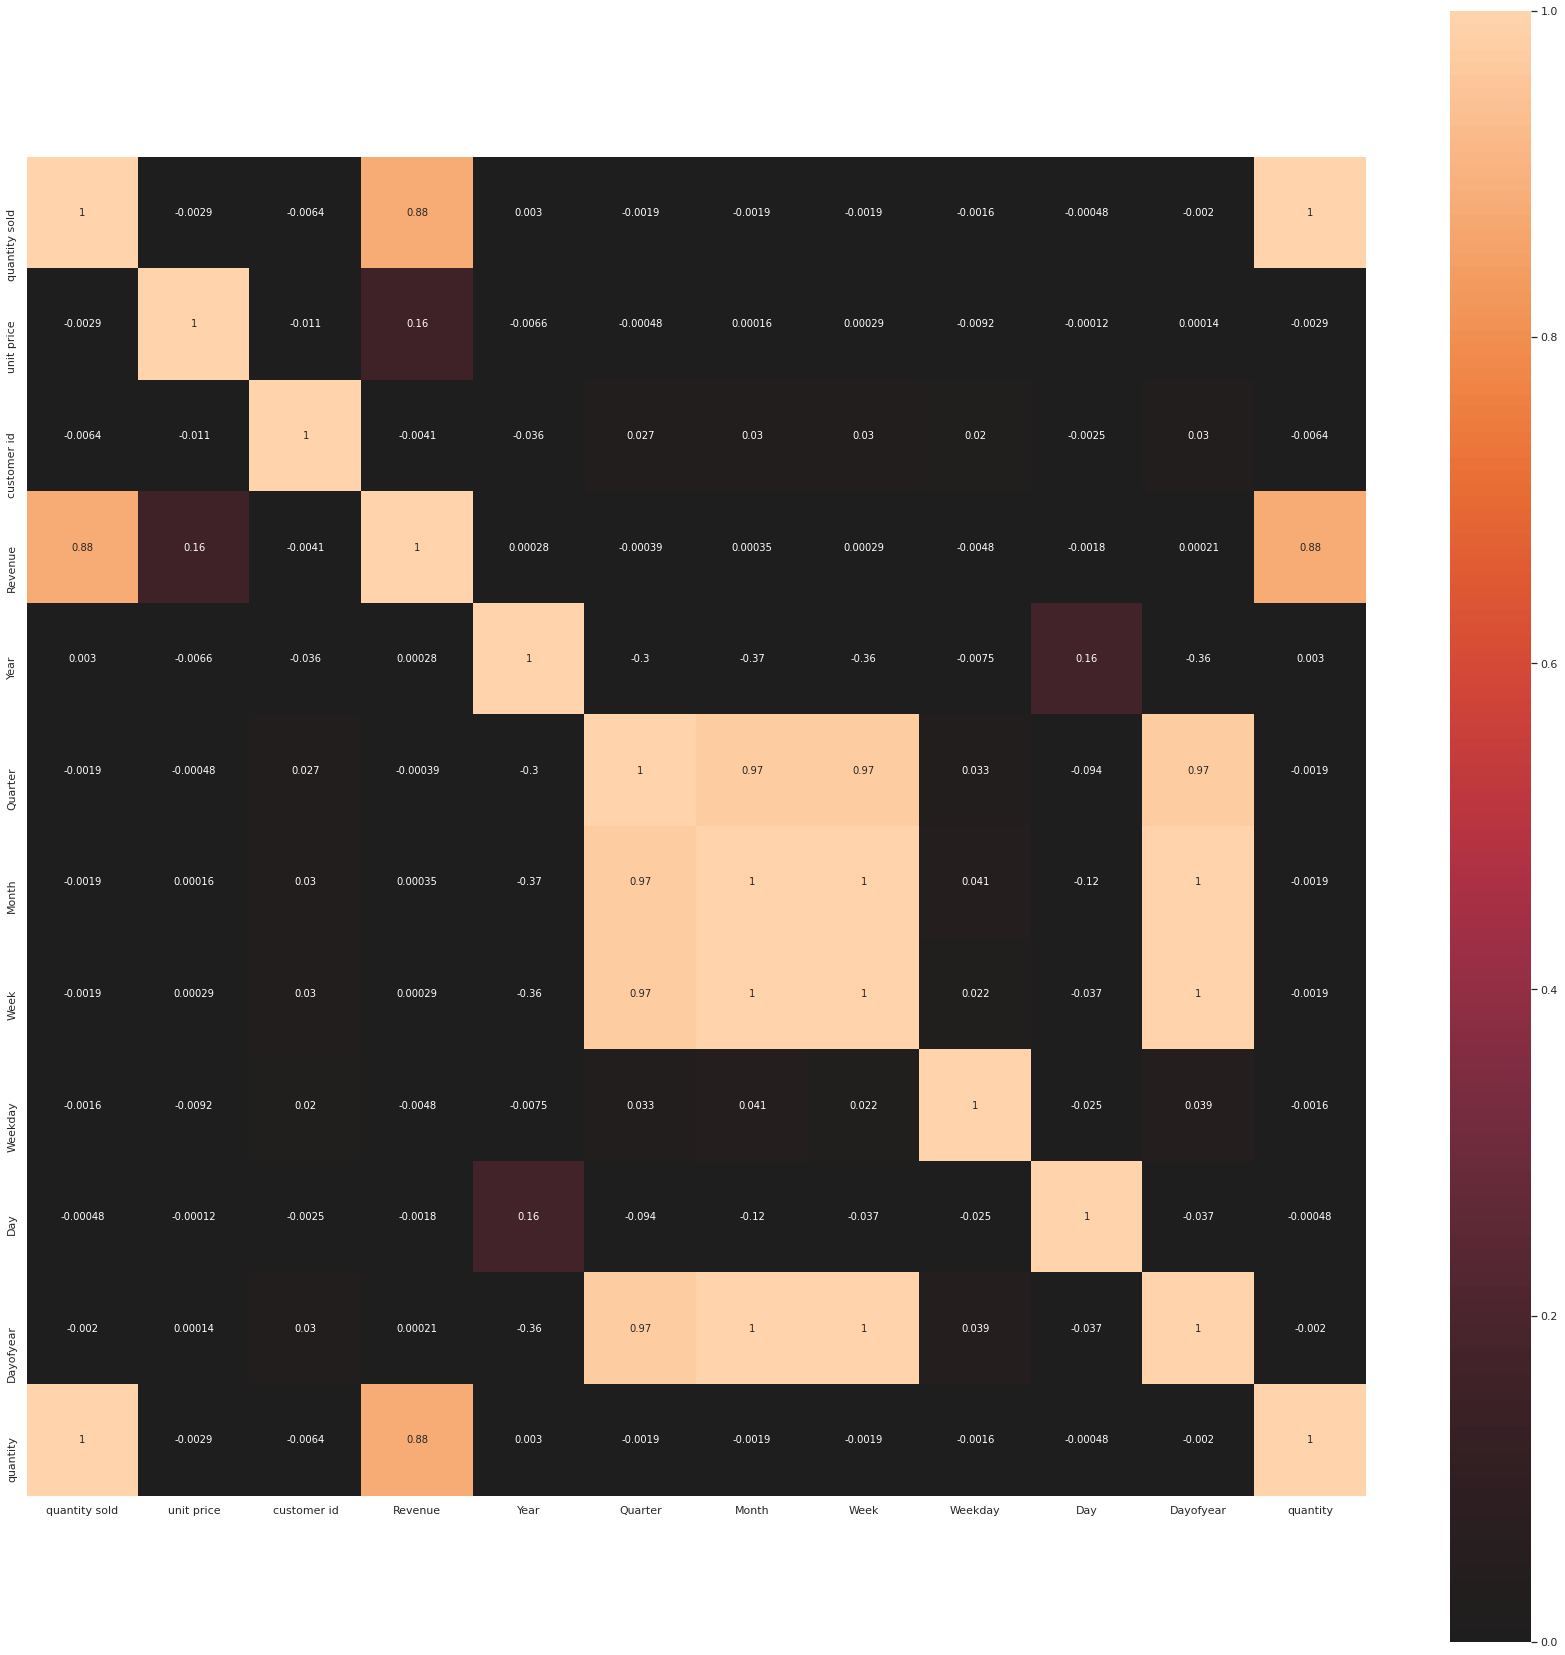

In [ ]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(data.corr(),annot=True,center=0,vmin=0, vmax=1,square=True)


In [ ]:
data['time'] = pd.to_datetime(data['transaction timestamp'])

In [ ]:
data

,ï»¿transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,timestamp,time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 8:26,2.55,17850.0,United Kingdom,12/01/2010 8:26,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 8:26,3.39,17850.0,United Kingdom,12/01/2010 8:26,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 8:26,2.75,17850.0,United Kingdom,12/01/2010 8:26,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 8:26,3.39,17850.0,United Kingdom,12/01/2010 8:26,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 8:26,3.39,17850.0,United Kingdom,12/01/2010 8:26,2010-12-01 08:26:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,12/09/2011 12:50,2011-12-09 12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,12/09/2011 12:50,2011-12-09 12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,12/09/2011 12:50,2011-12-09 12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,12/09/2011 12:50,2011-12-09 12:50:00


In [ ]:
data["Revenue"] = data['quantity sold'] * data['unit price']

data["Year"] = data['time'].dt.year
data["Quarter"] = data['time'].dt.quarter
data["Month"] = data['time'].dt.month
data["Week"] = data['time'].dt.week
data["Weekday"] = data['time'].dt.weekday
data["Day"] = data['time'].dt.day
data["Dayofyear"] = data['time'].dt.dayofyear
data["Date"] = pd.to_datetime(data[['Year', 'Month', 'Day']])

In [ ]:
data['quantity'] = data['quantity sold']
print(data['quantity'])

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: quantity, Length: 532621, dtype: int64


In [ ]:
grouped_features = ["Date", "Year", "Quarter","Month", "Week", "Weekday", "Dayofyear", "Day",
                    "product id"]

In [ ]:
daily_data = pd.DataFrame(data.groupby(grouped_features).quantity.sum(),
                          columns=["quantity"])
daily_data["Revenue"] = data.groupby(grouped_features).Revenue.sum()
daily_data = daily_data.reset_index()
daily_data

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,product id,quantity,Revenue
0,2010-12-01,2010,4,12,48,2,335,1,10002,60,51.00
1,2010-12-01,2010,4,12,48,2,335,1,10125,2,1.70
2,2010-12-01,2010,4,12,48,2,335,1,10133,5,4.25
3,2010-12-01,2010,4,12,48,2,335,1,10135,1,2.51
4,2010-12-01,2010,4,12,48,2,335,1,11001,3,10.08
...,...,...,...,...,...,...,...,...,...,...,...
277750,2011-12-09,2011,4,12,49,4,343,9,90206C,1,4.98
277751,2011-12-09,2011,4,12,49,4,343,9,90208,1,2.48
277752,2011-12-09,2011,4,12,49,4,343,9,90210A,1,2.90
277753,2011-12-09,2011,4,12,49,4,343,9,DOT,2,2647.34


In [ ]:
samples = daily_data.shape[0]

In [ ]:
low_quantity = daily_data.quantity.quantile(0.01)
high_quantity = daily_data.quantity.quantile(0.99)
print((low_quantity, high_quantity))

(1.0, 210.0)


In [ ]:
low_revenue = daily_data.Revenue.quantile(0.01)
high_revenue = daily_data.Revenue.quantile(0.99)
print((low_revenue, high_revenue))

(0.42, 384.9)


In [ ]:
daily_data = daily_data.loc[
    (daily_data.quantity >= low_quantity) & (daily_data.quantity <= high_quantity)]
daily_data = daily_data.loc[
    (daily_data.Revenue >= low_revenue) & (daily_data.Revenue <= high_revenue)]

How much entries have we lost?

In [ ]:
samples - daily_data.shape[0]

6694

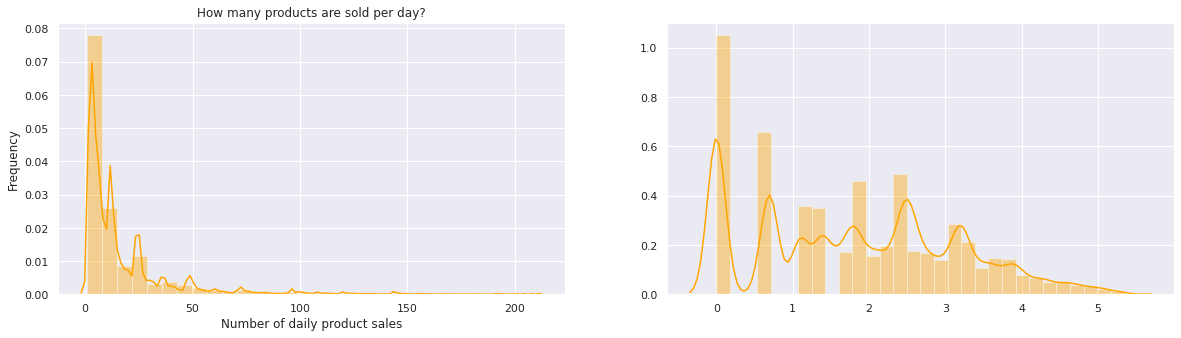

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(daily_data.quantity.values, kde=True, ax=ax[0], color="Orange", bins=30);
sns.distplot(np.log(daily_data.quantity.values), kde=True, ax=ax[1], color="Orange", bins=30);
ax[0].set_xlabel("Number of daily product sales");
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many products are sold per day?");

In [ ]:
daily_data.head()

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,product id,quantity,Revenue
0,2010-12-01,2010,4,12,48,2,335,1,10002,60,51.00
1,2010-12-01,2010,4,12,48,2,335,1,10125,2,1.70
2,2010-12-01,2010,4,12,48,2,335,1,10133,5,4.25
3,2010-12-01,2010,4,12,48,2,335,1,10135,1,2.51
4,2010-12-01,2010,4,12,48,2,335,1,11001,3,10.08


In [ ]:
week = daily_data.Week.max() - 2
print("Validation after week {}".format(week))
print("Validation starts at timepoint {}".format(
    daily_data[daily_data.Week==week].Date.min()
))

Validation after week 49
Validation starts at timepoint 2010-12-06 00:00:00


In [ ]:
products = pd.DataFrame(index=data.loc[data.Week < week]['product id'].unique(), columns = ["MedianPrice"])

products["MedianPrice"] = data.loc[data.Week < week].groupby("product id")['unit price'].median()
products["MedianQuantities"] = data.loc[data.Week < week].groupby("product id").quantity.median()
products["Customers"] = data.loc[data.Week < week].groupby("product id")['customer id'].nunique()
org_cols = np.copy(products.columns.values)
products.head()

,MedianPrice,MedianQuantities,Customers
85123A,2.95,6.0,825
71053,3.75,4.0,138
84406B,4.15,4.0,126
84029G,4.25,3.0,171
84029E,4.25,4.0,176


In [ ]:
X = products.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
km = KMeans(n_clusters=30)
products["cluster"] = km.fit_predict(X)

daily_data["ProductType"] = daily_data['product id'].map(products.cluster)
daily_data.ProductType = daily_data.ProductType.astype("object")
daily_data.head()

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,product id,quantity,Revenue,ProductType
0,2010-12-01,2010,4,12,48,2,335,1,10002,60,51.00,11
1,2010-12-01,2010,4,12,48,2,335,1,10125,2,1.70,21
2,2010-12-01,2010,4,12,48,2,335,1,10133,5,4.25,26
3,2010-12-01,2010,4,12,48,2,335,1,10135,1,2.51,19
4,2010-12-01,2010,4,12,48,2,335,1,11001,3,10.08,21


In [ ]:
daily_data["KnownStockCodeUnitPriceMedian"] = daily_data['product id'].map(
    data.groupby("product id")['unit price'].median())

known_price_iqr = data.groupby("product id")['unit price'].quantile(0.75) 
known_price_iqr -= data.groupby("product id")['unit price'].quantile(0.25) 
daily_data["KnownStockCodeUnitPriceIQR"] = daily_data['product id'].map(known_price_iqr)

In [ ]:
to_group = ["product id", "Year", "Month", "Week", "Weekday"]

daily_data = daily_data.set_index(to_group)
daily_data["KnownStockCodePrice_WW_median"] = daily_data.index.map(
    data.groupby(to_group)['unit price'].median())
daily_data["KnownStockCodePrice_WW_mean"] = daily_data.index.map(
    data.groupby(to_group)['unit price'].mean().apply(lambda l: np.round(l, 2)))
daily_data["KnownStockCodePrice_WW_std"] = daily_data.index.map(
    data.groupby(to_group)['unit price'].std().apply(lambda l: np.round(l, 2)))

daily_data = daily_data.reset_index()

In [ ]:
daily_data.head()

,product id,Year,Month,Week,Weekday,Date,Quarter,Dayofyear,Day,quantity,Revenue,ProductType,KnownStockCodeUnitPriceMedian,KnownStockCodeUnitPriceIQR,KnownStockCodePrice_WW_median,KnownStockCodePrice_WW_mean,KnownStockCodePrice_WW_std
0,10002,2010,12,48,2,2010-12-01,4,335,1,60,51.00,11,0.85,0.78,0.85,0.85,0.0
1,10125,2010,12,48,2,2010-12-01,4,335,1,2,1.70,21,0.85,0.04,0.85,0.85,NaN
2,10133,2010,12,48,2,2010-12-01,4,335,1,5,4.25,26,0.79,0.41,0.85,0.85,NaN
3,10135,2010,12,48,2,2010-12-01,4,335,1,1,2.51,19,1.25,0.03,2.51,2.51,NaN
4,11001,2010,12,48,2,2010-12-01,4,335,1,3,10.08,21,1.69,0.00,3.36,3.36,NaN


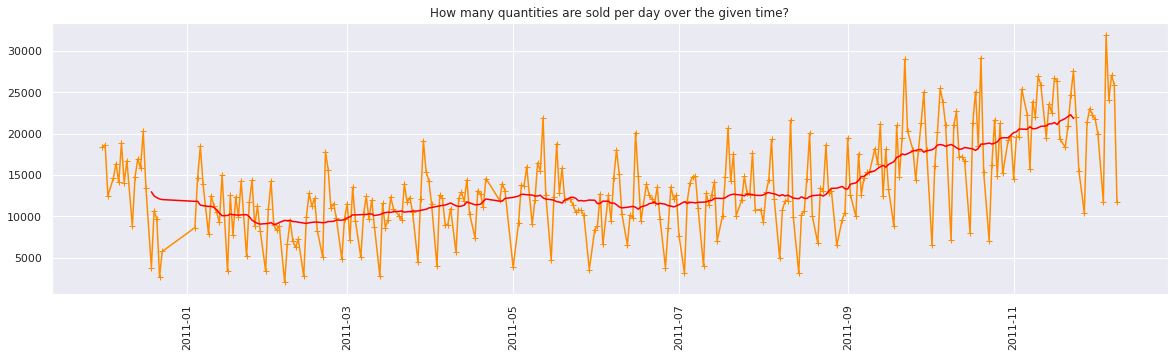

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(daily_data.groupby("Date").quantity.sum(), marker='+', c="darkorange")
plt.plot(daily_data.groupby("Date").quantity.sum().rolling(window=30, center=True).mean(),
        c="red")
plt.xticks(rotation=90);
plt.title("How many quantities are sold per day over the given time?");

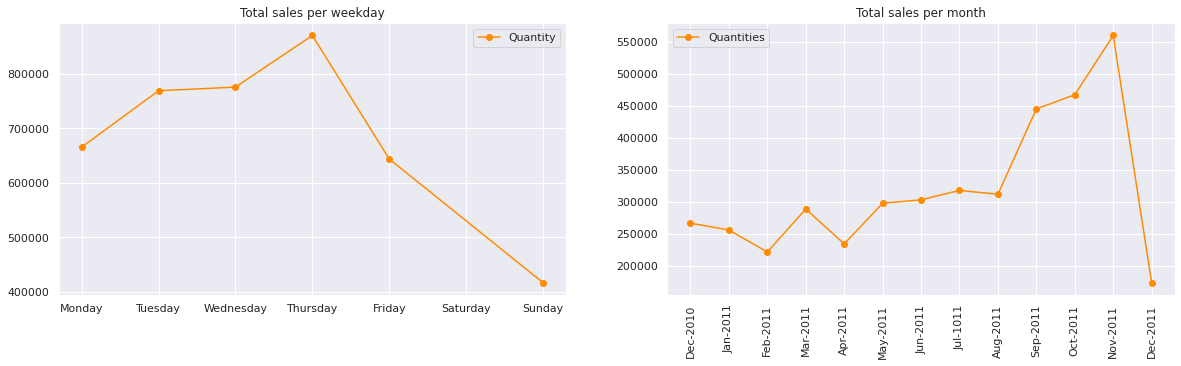

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
yearmonth = ["Dec-2010", "Jan-2011", "Feb-2011", "Mar-2011", "Apr-2011", "May-2011",
             "Jun-2011", "Jul-1011", "Aug-2011", "Sep-2011", "Oct-2011", "Nov-2011", 
             "Dec-2011"]

daily_data.groupby("Weekday").quantity.sum().plot(
    ax=ax[0], marker='o', label="Quantity", c="darkorange");
ax[0].legend();
ax[0].set_xticks(np.arange(0,7))
ax[0].set_xticklabels(weekdays);
ax[0].set_xlabel("")
ax[0].set_title("Total sales per weekday");

ax[1].plot(daily_data.groupby(["Year", "Month"]).quantity.sum().values,
    marker='o', label="Quantities", c="darkorange");
ax[1].set_xticklabels(yearmonth, rotation=90)
ax[1].set_xticks(np.arange(0, len(yearmonth)))
ax[1].legend();
ax[1].set_title("Total sales per month");

In [ ]:
pip install fbprophet

In [ ]:
from fbprophet import Prophet

In [ ]:
to_group = ["product id", 'quantity']

In [ ]:
daily_data

,product id,Year,Month,Week,Weekday,Date,Quarter,Dayofyear,Day,quantity,Revenue,ProductType,KnownStockCodeUnitPriceMedian,KnownStockCodeUnitPriceIQR,KnownStockCodePrice_WW_median,KnownStockCodePrice_WW_mean,KnownStockCodePrice_WW_std
0,10002,2010,12,48,2,2010-12-01,4,335,1,60,51.00,11,0.85,0.7800,0.85,0.85,0.00
1,10125,2010,12,48,2,2010-12-01,4,335,1,2,1.70,21,0.85,0.0400,0.85,0.85,NaN
2,10133,2010,12,48,2,2010-12-01,4,335,1,5,4.25,26,0.79,0.4100,0.85,0.85,NaN
3,10135,2010,12,48,2,2010-12-01,4,335,1,1,2.51,19,1.25,0.0300,2.51,2.51,NaN
4,11001,2010,12,48,2,2010-12-01,4,335,1,3,10.08,21,1.69,0.0000,3.36,3.36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271056,90202D,2011,12,49,4,2011-12-09,4,343,9,1,2.90,0,2.90,0.0250,2.90,2.90,NaN
271057,90206C,2011,12,49,4,2011-12-09,4,343,9,1,4.98,0,4.98,0.0075,4.98,4.98,NaN
271058,90208,2011,12,49,4,2011-12-09,4,343,9,1,2.48,0,2.48,0.0600,2.48,2.48,NaN
271059,90210A,2011,12,49,4,2011-12-09,4,343,9,1,2.90,0,2.90,1.2375,2.90,2.90,NaN


In [ ]:
df=daily_data[['product id','quantity','Date','Revenue','ProductType']]

In [ ]:
to_group = ['product id','ProductType','Date']

In [ ]:
df['new'] = (df.groupby(to_group)['quantity']).head(500)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df

,product id,quantity,Date,Revenue,ProductType,new
0,10002,60,2010-12-01,51.00,11,60
1,10125,2,2010-12-01,1.70,21,2
2,10133,5,2010-12-01,4.25,26,5
3,10135,1,2010-12-01,2.51,19,1
4,11001,3,2010-12-01,10.08,21,3
...,...,...,...,...,...,...
271056,90202D,1,2011-12-09,2.90,0,1
271057,90206C,1,2011-12-09,4.98,0,1
271058,90208,1,2011-12-09,2.48,0,1
271059,90210A,1,2011-12-09,2.90,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271061 entries, 0 to 271060
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   product id   271061 non-null  object        
 1   quantity     271061 non-null  int64         
 2   Date         271061 non-null  datetime64[ns]
 3   Revenue      271061 non-null  float64       
 4   ProductType  271022 non-null  object        
 5   new          271061 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 12.4+ MB


In [ ]:
df1 = df[['Date','new']]

In [ ]:
df1['ds'] = df1['Date']
df1['y'] = df1['new']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2 = df1[['ds','y']]

In [ ]:
df2

,ds,y
0,2010-12-01,60
1,2010-12-01,2
2,2010-12-01,5
3,2010-12-01,1
4,2010-12-01,3
...,...,...
271056,2011-12-09,1
271057,2011-12-09,1
271058,2011-12-09,1
271059,2011-12-09,1


In [ ]:
model = Prophet()
model.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=30)
future.tail()

,ds
271086,2012-01-04
271087,2012-01-05
271088,2012-01-06
271089,2012-01-07
271090,2012-01-08


In [ ]:
forecast = model.predict(future)

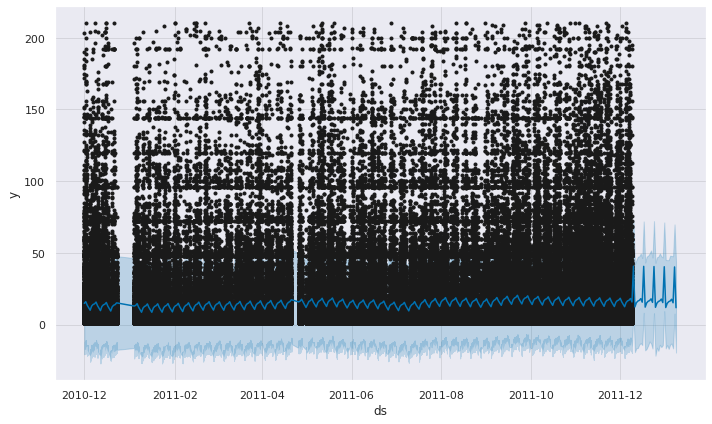

In [ ]:
plot1 = model.plot(forecast)

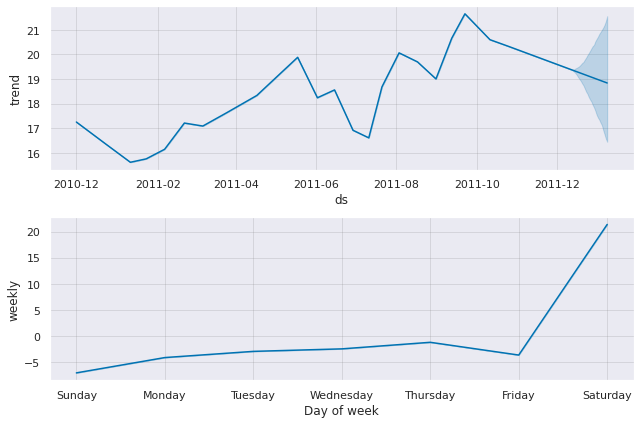

In [ ]:
plot2 = model.plot_components(forecast)

In [ ]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
271421,2012-12-04
271422,2012-12-05
271423,2012-12-06
271424,2012-12-07
271425,2012-12-08


In [ ]:
forecast = model.predict(future)

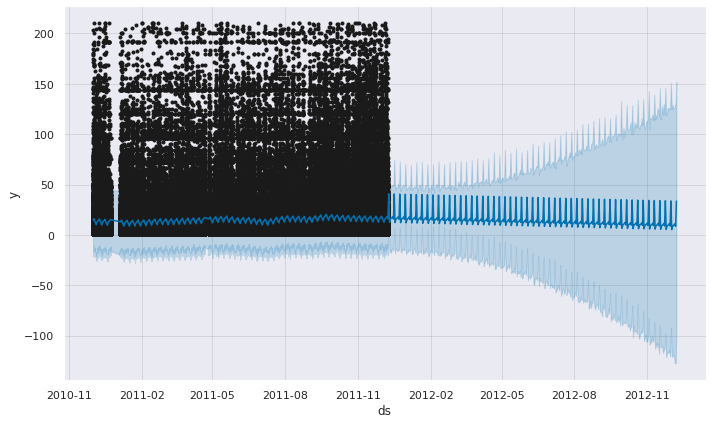

In [ ]:
plot1 = model.plot(forecast)

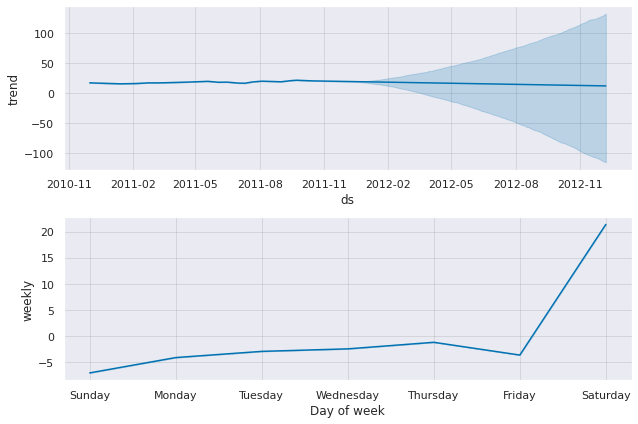

In [ ]:
plot2 = model.plot_components(forecast)